# Import Libraries

In [20]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import time

# Data preprocessing

In [21]:
# load the datasheet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# transform the y data to categorical
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# x data normalisation
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

length_training = int(0.8 * len(x_train))
length_testing = int(0.2 * len(x_train))

x_train, x_validation = tf.split(x_train, [length_training, length_testing], 0)
y_train, y_validation = tf.split(y_train, [length_training, length_testing], 0)



# Hyperparameters

In [22]:
batch_sizes_baseline = [256, length_training]
epochs = 100
batch_size = 256
rho = [0.01, 0.99]
learning_rate_rms = 0.001
learning_rate_sgd = 0.01

# Baseline Model

Epoch 1/100
188/188 [==============================] - 78s 413ms/step - loss: 0.3999 - categorical_accuracy: 0.8855 - val_loss: 0.2389 - val_categorical_accuracy: 0.9257
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1714 - categorical_accuracy: 0.9482 - val_loss: 0.1420 - val_categorical_accuracy: 0.9576
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1167 - categorical_accuracy: 0.9643 - val_loss: 0.1447 - val_categorical_accuracy: 0.9558
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0869 - categorical_accuracy: 0.9732 - val_loss: 0.1164 - val_categorical_accuracy: 0.9652
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0680 - categorical_accuracy: 0.9786 - val_loss: 0.0974 - val_categorical_accuracy: 0.9709
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0544 - categorical_accuracy: 0.9830 - val_loss: 0.0933 - val_categorical_accuracy: 0.

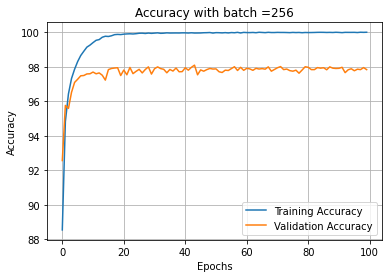

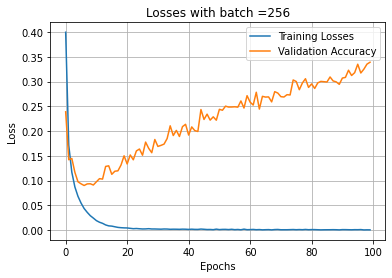

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3690 - categorical_accuracy: 0.0491 - val_loss: 2.0527 - val_categorical_accuracy: 0.5194
Epoch 2/100
1/1 [==============================] - 0s 278ms/step - loss: 2.0594 - categorical_accuracy: 0.5008 - val_loss: 1.7709 - val_categorical_accuracy: 0.6287
Epoch 3/100
1/1 [==============================] - 0s 302ms/step - loss: 1.7802 - categorical_accuracy: 0.6151 - val_loss: 1.4687 - val_categorical_accuracy: 0.7337
Epoch 4/100
1/1 [==============================] - 0s 305ms/step - loss: 1.4903 - categorical_accuracy: 0.7143 - val_loss: 1.3154 - val_categorical_accuracy: 0.6399
Epoch 5/100
1/1 [==============================] - 0s 300ms/step - loss: 1.3328 - categorical_accuracy: 0.6288 - val_loss: 1.2120 - val_categorical_accuracy: 0.6752
Epoch 6/100
1/1 [==============================] - 0s 295ms/step - loss: 1.2550 - categorical_accuracy: 0.6514 - val_loss: 1.0622 - val_categorical_accuracy: 0.7130
Epoch 7/100
1

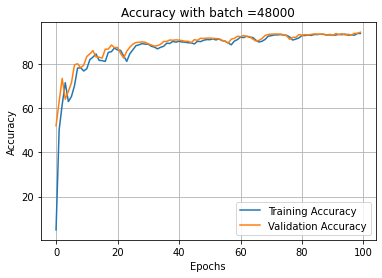

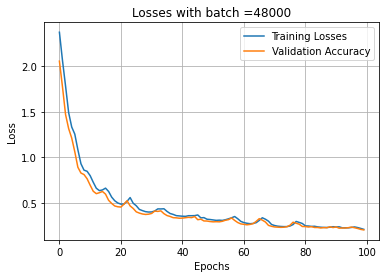

In [23]:
for batch in batch_sizes_baseline:
    start = time.time()
    model_baseline = Sequential()
    model_baseline.add(Flatten(input_shape=(28, 28)))
    model_baseline.add(Dense(128, activation='relu'))
    model_baseline.add(Dense(256, activation='relu'))
    model_baseline.add(Dense(10, activation='softmax'))
    model_baseline.compile(loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model = model_baseline.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_data=(x_validation, y_validation))
    
    print(f'Time passed -> ' +str(time.time() - start))

    train_accuracy = [fit_model.history['categorical_accuracy'][i] * 100 for i in range(100)]
    validation_accuracy = [fit_model.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with batch =' + str(batch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.grid()
    plt.show()
    
    train_loss = fit_model.history['loss']
    validation_loss = fit_model.history['val_loss']
    
    plt.plot(train_loss)
    plt.plot(validation_loss)

    plt.title(f'Losses with batch =' + str(batch))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Accuracy'], loc='upper right')
    plt.grid()
    plt.show()

# RMSProp

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4709 - categorical_accuracy: 0.8680 - val_loss: 0.2296 - val_categorical_accuracy: 0.9331
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1988 - categorical_accuracy: 0.9405 - val_loss: 0.1590 - val_categorical_accuracy: 0.9533
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1458 - categorical_accuracy: 0.9569 - val_loss: 0.1341 - val_categorical_accuracy: 0.9613
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1166 - categorical_accuracy: 0.9661 - val_loss: 0.1182 - val_categorical_accuracy: 0.9672
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0973 - categorical_accuracy: 0.9717 - val_loss: 0.1277 - val_categorical_accuracy: 0.9661
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0855 - categorical_accuracy: 0.9758 - val_loss: 0.1182 - val_categorical_accuracy: 0.967

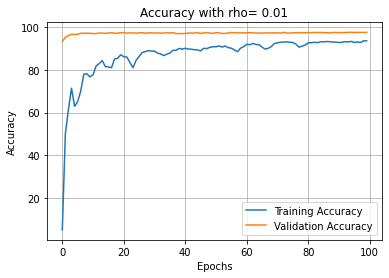

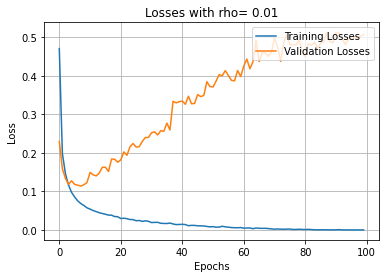

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3423 - categorical_accuracy: 0.8940 - val_loss: 0.1886 - val_categorical_accuracy: 0.9448
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1390 - categorical_accuracy: 0.9586 - val_loss: 0.1679 - val_categorical_accuracy: 0.9454
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0985 - categorical_accuracy: 0.9706 - val_loss: 0.0994 - val_categorical_accuracy: 0.9711
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0719 - categorical_accuracy: 0.9781 - val_loss: 0.0949 - val_categorical_accuracy: 0.9715
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0562 - categorical_accuracy: 0.9828 - val_loss: 0.0866 - val_categorical_accuracy: 0.9747
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0437 - categorical_accuracy: 0.9863 - val_loss: 0.0929 - val_categorical_accuracy: 0.973

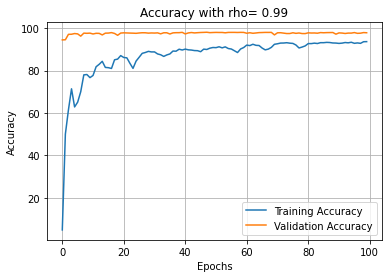

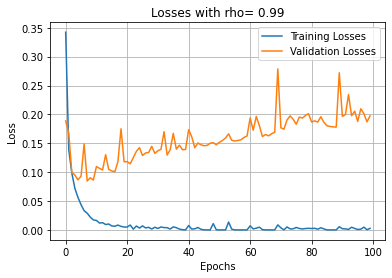

In [24]:
for r in rho:
    start = time.time()
    model_rms = Sequential()
    model_rms.add(Flatten(input_shape=(28, 28)))
    model_rms.add(Dense(128, activation='relu'))
    model_rms.add(Dense(256, activation='relu'))
    model_rms.add(Dense(10, activation='softmax'))
    model_rms.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate_rms, rho=r),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model_rms = model_rms.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
    
    print(f'Time passed -> ' +str(time.time() - start))
    
    validation_accuracy = [fit_model_rms.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with rho= ' + str(r))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.grid()
    plt.show()
    
    train_loss = fit_model_rms.history['loss']
    validation_loss = fit_model_rms.history['val_loss']

    plt.plot(train_loss)
    plt.plot(validation_loss)

    plt.title(f'Losses with rho= ' + str(r))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Losses'], loc='upper right')
    plt.grid()
    plt.show()
